In [3]:
from env_setting.env_module import result_cp_path
from python_lib.pkl_saver import PklSaver
import os
from data_helper.data_path_helper.pcap_path_helper import get_pcap_list_by_date_and_count, get_test_pcap_list_count

import matplotlib.pyplot as plt
import math

level_list = [8, 6, 5]
row_list = [4, 5, 6]
width_list = [32768, 32768, 32768]
flag_list = [False, False, False]

pcap_list = get_pcap_list_by_date_and_count(20140320, "60s", 20)

total = []
ent = []
sketch_name = "univmon"
for width, row, level, flag, in zip(width_list, row_list, level_list, flag_list):
    data_list = []
    for seed in [1]:
        for (pcap_full_path, pcap_folder_path, pcap_file_name) in pcap_list:
            str = "row_%d_level_%d_width_%d" % (row, level, width)
            str2 = "%02d.txt" % seed
            pkl_path = os.path.join(result_cp_path, "SketchLib", sketch_name, pcap_file_name, str, str2)
            saver = PklSaver(pkl_path, "data.pkl")
            data = saver.load()
            # cardinality
            data_list.append(data[0][5])
            data_list.append(data[1][5])

#             # entropy
#             data_list.append(data[0][2])
#             data_list.append(data[1][2])
#             if flag:
#                 data_list.append(data[0][6])
#                 data_list.append(data[1][6])
                

                
    total.append(data_list)


In [4]:
from statistics import median

print(median(total[0]))
print(median(total[1]))
print(median(total[2]))

95.49961847421483
98.80678640459348
99.44640098141517


In [ ]:
95.45440089082692
98.80422354316975
99.44640098141517
9.52201846434004

In [ ]:
old version

In [18]:
from env_setting.env_module import result_cp_path
from python_lib.pkl_saver import PklSaver
import os
from data_helper.data_path_helper.pcap_path_helper import get_pcap_list_by_date_and_count, get_test_pcap_list_count

import matplotlib.pyplot as plt
import math

row_list = [1, 3, 5, 5]
level_list = [8, 6, 5, 16]
width_list = [131072, 32768, 32768, 2048]
flag_list = [False, False, False, True]

pcap_list = get_pcap_list_by_date_and_count(20140320, "60s", 20)

total = []
ent = []
sketch_name = "univmon"
for width, row, level, flag, in zip(width_list, row_list, level_list, flag_list):
    data_list = []
    for seed in [1]:
        for (pcap_full_path, pcap_folder_path, pcap_file_name) in pcap_list:
            str = "row_%d_level_%d_width_%d" % (row, level, width)
            str2 = "%02d.txt" % seed
            pkl_path = os.path.join(result_cp_path, "SketchLib", sketch_name, pcap_file_name, str, str2)
            saver = PklSaver(pkl_path, "data.pkl")
            data = saver.load()
#             # cardinality
#             data_list.append(data[0][5])
#             data_list.append(data[1][5])

            # entropy
            data_list.append(data[0][2])
            data_list.append(data[1][2])
#             if flag:
#                 data_list.append(data[0][6])
#                 data_list.append(data[1][6])
                

                
    total.append(data_list)



In [19]:
from statistics import median

print(median(total[0]))
print(median(total[1]))
print(median(total[2]))
print(median(total[3]))


12.223429589935613
49.473950056296275
59.226325574909325
3.3903397712150207


In [16]:
from statistics import median

# print(median(total[0]))
# print(median(total[1]))
# print(median(total[2]))
print(median(total[3]))


0.7303945279140098


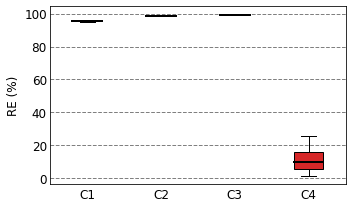

In [7]:
def count_sketch_plot(data, ylabel, labels, colors, figsize):
    values = []

    position = 0
    positions = []

    for i, v in enumerate(data):
        # labels.append("%d.txt" % (i+1))
        values.append(v)
        # colors.append('C'+str(int(i)))
        positions.append(position)
        position += 1


    plt.figure(figsize=figsize)

    box_plot_data = values
    box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    for median in box['medians']:
        median.set(color='black', linewidth=2)

    plt.tick_params(labelsize=12)

    # plt.axis('off')

    ax = plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    # ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
    # ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

    # plt.title(title)
    plt.ylabel(ylabel, fontsize = 12)
    # plt.ylim([1.5, 4.5])
    from matplotlib.ticker import MultipleLocator
#     ax.yaxis.set_major_locator(MultipleLocator(2))
    # plt.legend([box['boxes'][0], box['boxes'][1]], ['original', 'with optimization'], loc=1, bbox_to_anchor=(1,1.5), fontsize=12)
    # plt.xticks([0.5, 2.5, 4.5],
    #            ["trace1",
    #             "trace2",
    #             "trace3"])

    # if title == "count-sketch":
    # if title == "univmon-cardinality":
    #     from matplotlib.ticker import MultipleLocator
    #     ax.yaxis.set_major_locator(MultipleLocator(5))
    #     plt.ylabel("RE (%)", fontsize = 12)
    #     plt.xticks([0.5, 2.5, 4.5, 6.5, 8.5],
    #                ["trace1",
    #                 "trace2",
    #                 "trace3",
    #                 "trace4",
    #                 "trace5"])
    # if title == "univmon-entropy":
    #     plt.ylabel("RE (%)", fontsize = 12)
    #     plt.xticks([0.5, 2.5, 4.5, 6.5, 8.5],
    #                ["trace1",
    #                 "trace2",
    #                 "trace3",
    #                 "trace4",
    #                 "trace5"])

    # plt.legend(prop={'size': 15})
    # plt.xlabel('traces', fontsize = 15)

    plt.grid(color='gray', linestyle='--', linewidth=1)
    ax.xaxis.grid(False)
    plt.tight_layout()
#     plt.savefig("/Users/hnamkung/Desktop/cs.pdf")
    plt.show()
    plt.close()
count_sketch_plot(total, "RE (%)", ["C1", "C2", "C3", "C4"], ["C0", "C1", "C2", "C3"], (5,3) )

In [7]:
print(len(total))

4


In [9]:
print(len(total[0]))
print(len(total[1]))
print(len(total[2]))
print(len(total[3]))

40
40
40
40


In [12]:
from statistics import median

print(median(total[0]))
print(median(total[1]))
print(median(total[2]))
print(median(total[3]))


95.45440089082692
98.80422354316975
99.44640098141517
9.52201846434004
